In [34]:
#importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#lectura

import gdown

url = 'https://drive.google.com/uc?id=1E095HumEJMjJ-JixspNlB2CHhLHJ9yoJ'
output = 'olist_geolocation_dataset_completo_falta_limpiar.csv'
gdown.download(url, output, quiet=False)

# Ahora lee el archivo CSV
data = pd.read_csv(output, sep=';')

Downloading...
From: https://drive.google.com/uc?id=1E095HumEJMjJ-JixspNlB2CHhLHJ9yoJ
To: /content/olist_geolocation_dataset_completo_falta_limpiar.csv
100%|██████████| 59.9M/59.9M [00:00<00:00, 91.8MB/s]


In [35]:
print(data.shape)
data.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [36]:
#Variables categoricas y numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [37]:
columnas=[]

for e in data:
  columnas.append(e)

print(columnas)

['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


In [38]:
#Conteo de los niveles en las diferentes columnas categoricas

for col in columnas:
  print(f'Columna {col}:{data[col].nunique()}subniveles')

Columna geolocation_zip_code_prefix:19015subniveles
Columna geolocation_lat:717360subniveles
Columna geolocation_lng:717613subniveles
Columna geolocation_city:6105subniveles
Columna geolocation_state:27subniveles


In [39]:
data.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.122252e+01,-4.643727e+01
std,3.054934e+04,3.328709e+01,4.692645e+01
min,1.001000e+03,-2.321100e+04,-4.678200e+04
25%,1.107500e+04,-2.360355e+01,-4.857321e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [40]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set despues de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (1000163, 5)
Tamaño del set despues de eliminar las filas repetidas: (720934, 5)


Text(0.5, 1.0, 'Cantidad de Ciudades por Estado')

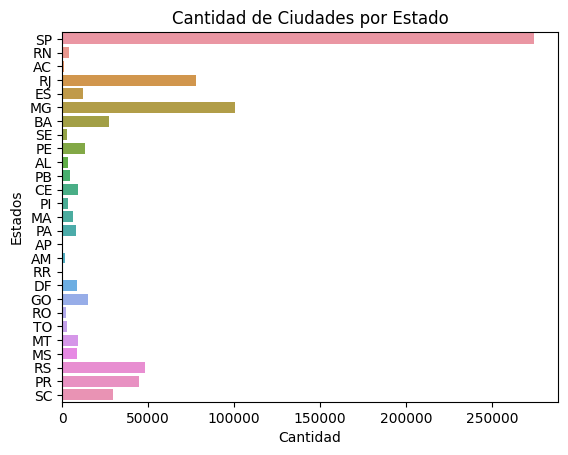

In [41]:
cols_cat=['geolocation_state']



sns.countplot(y=cols_cat[0], data=data )
plt.ylabel('Estados')
plt.xlabel('Cantidad')
plt.title("Cantidad de Ciudades por Estado")